In [ ]:
# https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_agentic_rag/#8-run-the-agentic-rag

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [ ]:
from langchain_community.document_loaders import WebBaseLoader

urls = [
    "https://lilianweng.github.io/posts/2024-11-28-reward-hacking/",
    "https://lilianweng.github.io/posts/2024-07-07-hallucination/",
    "https://lilianweng.github.io/posts/2024-04-12-diffusion-video/",
]

docs = [WebBaseLoader(url).load() for url in urls]

In [2]:
docs[0][0].page_content.strip()[:1000]

"Reward Hacking in Reinforcement Learning | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      Reward Hacking in Reinforcement Learning\n    \nDate: November 28, 2024  |  Estimated Reading Time: 37 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBackground\n\nReward Function in RL\n\nSpurious Correlation\n\n\nLet’s Define Reward Hacking\n\nList of Examples\n\nReward hacking examples in RL tasks\n\nReward hacking examples in LLM tasks\n\nReward hacking examples in real life\n\n\nWhy does Reward Hacking Exist?\n\n\nHacking RL Environment\n\nHacking RLHF of LLMs\n\nHacking the Training Process\n\nHacking the Evaluator\n\nIn-Context Reward Hacking\n\n\nGeneralization of Hacking Skills\n\nPeek into Mitigations\n\nRL Algorithm Improvement\n\nDetecting Reward Hacking\n\nData Analysis of RLHF\

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100, chunk_overlap=50
)
doc_splits = text_splitter.split_documents(docs_list)

In [4]:
doc_splits[0].page_content.strip()

"Reward Hacking in Reinforcement Learning | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ"

In [5]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_huggingface import HuggingFaceEmbeddings

model_name = "all-MiniLM-L6-v2"
embeddings = HuggingFaceEmbeddings(model_name=model_name)

# Replace the original code
vectorstore = InMemoryVectorStore.from_documents(
    documents=doc_splits, embedding=embeddings
)
retriever = vectorstore.as_retriever()

In [6]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_blog_posts",
    "Search and return information about Lilian Weng blog posts.",
)

In [7]:
retriever_tool.invoke({"query": "types of reward hacking"})

'Why does Reward Hacking Exist?#\n\nReward hacking examples in LLM tasks\n\nReward hacking examples in real life\n\n\nWhy does Reward Hacking Exist?\n\n\nHacking RL Environment\n\nHacking RLHF of LLMs\n\nHacking the Training Process\n\nHacking the Evaluator\n\nIn-Context Reward Hacking\n\n\nGeneralization of Hacking Skills\n\nPeek into Mitigations\n\nRL Algorithm Improvement\n\nDetecting Reward Hacking\n\nMost of the past work on this topic has been quite theoretical and focused on defining or demonstrating the existence of reward hacking. However, research into practical mitigations, especially in the context of RLHF and LLMs, remains limited. I especially want to call out for more research efforts directed toward understanding and developing mitigation for reward hacking in the future. Hope I will be able to cover the mitigation part in a dedicated post soon.\nBackground#\nReward Function in RL#\n\nPan et al. (2022) investigated reward hacking as a function of agent capabilities, inc

In [ ]:
from langgraph.graph import MessagesState
from langchain.chat_models import init_chat_model
from langchain_ollama import ChatOllama
response_model = ChatOllama(model="qwen3:4b", temperature=0)

def generate_query_or_respond(state: MessagesState):
    """ 
    Call the model to generate response based on the current state
    """
    response = (
        response_model
        .bind_tools([retriever_tool]).invoke(state["messages"])
    )
    return {"messages": [response]}

In [12]:
input = {"messages": [{"role": "user", "content": "hello!"}]}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

<think>
Okay, the user said "hello!". Let me check what tools I have. The only tool provided is retrieve_blog_posts, which searches Lilian Weng's blog posts. But the user just greeted me, so they probably don't need a blog post search right now. I should respond politely without using any tools. Since there's no function that handles greetings, I shouldn't call any tools here. Just a friendly reply.
</think>

Hello! How can I assist you today? 😊


In [13]:
input = {
    "messages": [
        {
            "role": "user",
            "content": "What does Lilian Weng say about types of reward hacking?",
        }
    ]
}
generate_query_or_respond(input)["messages"][-1].pretty_print()

================================== Ai Message ==================================

<think>
Okay, the user is asking what Lilian Weng says about types of reward hacking. Let me think. First, I need to check if there's a function provided that can help with this. The tools section mentions a function called retrieve_blog_posts that searches Lilian Weng's blog posts.

So, the user wants information on types of reward hacking from her blog. The function requires a query parameter. I should construct a query that's specific enough to find relevant posts. Maybe the query could be "types of reward hacking" or "reward hacking types".

Wait, the function's description says it's for searching Lilian Weng's blog posts. So I need to use that function to get the posts related to the user's question. The parameters need a "query" string. Let me make sure the query is phrased correctly. The user is asking about types of reward hacking, so the query should be something like "types of reward hacking" to

In [32]:
from pydantic import BaseModel, Field
from typing import Literal

GRADE_PROMPT = (
    "You are a grader assessing relevance of a retrieved document to a user question. \n "
    "Here is the retrieved document: \n\n {context} \n\n"
    "Here is the user question: {question} \n"
    "If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n"
    "Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."
)

class GradeDocuments(BaseModel):
    """
    "Grade documents using a binary score for relevance check.
    """
    binary_score: str = Field(
        description="Relevance score: 'yes' if relevant, or 'no' if not relevant"
    )

grader_model = ChatOllama(model="qwen3:4b", temperature=0)

def grade_documents(
    state: MessagesState,
) -> Literal["generate_answer", "rewrite_question"]:
    """ 
    Determine whether the retrienved documenets are relevant to the question"""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    promt = GRADE_PROMPT.format(question=question, context=context)
    response = (
        grader_model.with_structured_output(GradeDocuments).invoke(
            [{"role": "user", "content": promt}]
        )
    )
    score = response.binary_score
    if score == "yes":
        return "generate_answer"
    else:
        return "rewrite_question"

In [33]:
from langchain_core.messages import convert_to_messages

input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}
grade_documents(input)

'rewrite_question'

In [34]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "reward hacking can be categorized into two types: environment or goal misspecification, and reward tampering",
                "tool_call_id": "1",
            },
        ]
    )
}
grade_documents(input)

'rewrite_question'

In [35]:
REWRITE_PROMPT = (
    "Look at the input and try to reason about the underlying semantic intent / meaning.\n"
    "Here is the initial question:"
    "\n ------- \n"
    "{question}"
    "\n ------- \n"
    "Formulate an improved question:"
)


def rewrite_question(state: MessagesState):
    """Rewrite the original user question."""
    messages = state["messages"]
    question = messages[0].content
    prompt = REWRITE_PROMPT.format(question=question)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [{"role": "user", "content": response.content}]}

In [36]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {"role": "tool", "content": "meow", "tool_call_id": "1"},
        ]
    )
}

response = rewrite_question(input)
print(response["messages"][-1]["content"])

<think>
Okay, the user wants me to look at this question about Lilian Weng and reward hacking, then formulate an improved version. 

First, I need to unpack what's going on here. The original question is: "What does Lilian Weng say about types of reward hacking?" Hmm, that sounds a bit off. I recall Lilian Weng is a researcher in AI safety, specifically known for her work on reward hacking in reinforcement learning. But the phrasing "types of reward hacking" is problematic because in her field, reward hacking isn't categorized into types like that - it's more about how agents exploit reward functions.

Wait, the user mentioned "underlying semantic intent" so I should think about what they're really trying to ask. Probably they want to know what Lilian Weng has written about how reward hacking manifests or examples of it. But the word "types" is misleading here - in RL literature, we don't say "types of reward hacking" but rather "examples of reward hacking behaviors" or "common reward 

In [37]:
GENERATE_PROMPT = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer the question. "
    "If you don't know the answer, just say that you don't know. "
    "Use three sentences maximum and keep the answer concise.\n"
    "Question: {question} \n"
    "Context: {context}"
)


def generate_answer(state: MessagesState):
    """Generate an answer."""
    question = state["messages"][0].content
    context = state["messages"][-1].content
    prompt = GENERATE_PROMPT.format(question=question, context=context)
    response = response_model.invoke([{"role": "user", "content": prompt}])
    return {"messages": [response]}

In [38]:
input = {
    "messages": convert_to_messages(
        [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            },
            {
                "role": "assistant",
                "content": "",
                "tool_calls": [
                    {
                        "id": "1",
                        "name": "retrieve_blog_posts",
                        "args": {"query": "types of reward hacking"},
                    }
                ],
            },
            {
                "role": "tool",
                "content": "reward hacking can be categorized into two types: environment or goal misspecification, and reward tampering",
                "tool_call_id": "1",
            },
        ]
    )
}

response = generate_answer(input)
response["messages"][-1].pretty_print()

================================== Ai Message ==================================

<think>
Hmm, the user is asking about what Lilian Weng says regarding types of reward hacking. I need to check the retrieved context to see if it contains that information.

Looking at the context provided: "reward hacking can be categorized into two types: environment or goal misspecification, and reward tampering". This seems to be a description of reward hacking types, but it doesn't mention Lilian Weng specifically. The context is stating the categorization without attributing it to any person.

I recall that Lilian Weng is a researcher in AI safety who has written about reward hacking. In her work, she does categorize reward hacking into two types: environment misspecification and goal misspecification (which might be what the context means by "environment or goal misspecification"), and reward tampering. But the context here doesn't explicitly say "Lilian Weng says" - it just states the categorizati

In [39]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

workflow = StateGraph(MessagesState)

workflow.add_node(generate_query_or_respond)
workflow.add_node("retrieve", ToolNode([retriever_tool]))
workflow.add_node(rewrite_question)
workflow.add_node(generate_answer)

workflow.add_edge(START, "generate_query_or_respond")

# Decicde wheter to retrieve
workflow.add_conditional_edges(
    "generate_query_or_respond",
    tools_condition,
    {
        #  Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    }
)

workflow.add_conditional_edges(
    "retrieve",
    # Assss agent decision
    grade_documents
)

workflow.add_edge("generate_answer", END)
workflow.add_edge("rewrite_question", "generate_query_or_respond")

# Compile
graph = workflow.compile()


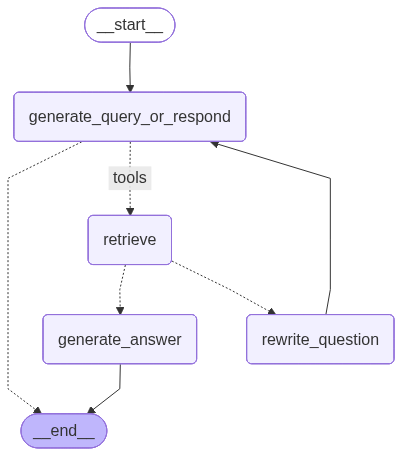

In [40]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
for chunk in graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "What does Lilian Weng say about types of reward hacking?",
            }
        ]
    }
):
    for node, update in chunk.items():
        print("Update from node", node)
        update["messages"][-1].pretty_print()
        print("\n\n")

Update from node generate_query_or_respond
================================== Ai Message ==================================

<think>
Okay, the user is asking what Lilian Weng says about types of reward hacking. Let me think. First, I need to check if there's a function provided that can help with this. The tools section mentions a function called retrieve_blog_posts that searches Lilian Weng's blog posts.

So, the user wants information on types of reward hacking from her blog. The function requires a query parameter. I should construct a query that's specific enough to find relevant posts. Maybe the query could be "types of reward hacking" or "reward hacking types".

Wait, the function's description says it's for searching Lilian Weng's blog posts. So I need to use that function to get the posts related to the user's question. The parameters need a "query" string. Let me make sure the query is phrased correctly. The user is asking about types of reward hacking, so the query should be 

AttributeError: 'dict' object has no attribute 'pretty_print'